In [ ]:
# Install memory_profiler, as it's not pre-installed in Colab.
# The other required packages (matplotlib, numpy) are already available.
!pip install -q memory_profiler

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Load the memory_profiler extension to use the %mprun magic command
%load_ext memory_profiler

print("✅ Libraries imported and ready.")

✅ Libraries imported and ready.


In [ ]:
# 1a. Naïve Recursive Fibonacci
def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

# 1b. Dynamic Programming (Memoization) Fibonacci
def fib_dp(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib_dp(n - 1, memo) + fib_dp(n - 2, memo)
    return memo[n]

# --- Example Usage ---
n_test = 15
print(f"Recursive Fib({n_test}): {fib_recursive(n_test)}")
# We pass a new dictionary for memoization each time to reset the cache
print(f"DP Fib({n_test}): {fib_dp(n_test, memo={})}")

Recursive Fib(15): 610
DP Fib(15): 610


In [ ]:
# 2. Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half, right_half = arr[:mid], arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half): arr[k], i, k = left_half[i], i + 1, k + 1
        while j < len(right_half): arr[k], j, k = right_half[j], j + 1, k + 1
    return arr

# 3. Quick Sort
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort_helper(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort_helper(arr, low, pi - 1)
        quick_sort_helper(arr, pi + 1, high)

def quick_sort(arr):
    quick_sort_helper(arr, 0, len(arr) - 1)
    return arr

# --- Example Usage ---
my_list = [64, 34, 25, 12, 22, 11, 90]
print(f"Original List: {my_list}")
print(f"Merge Sorted:  {merge_sort(my_list.copy())}")
print(f"Quick Sorted:  {quick_sort(my_list.copy())}")

Original List: [64, 34, 25, 12, 22, 11, 90]
Merge Sorted:  [11, 12, 22, 25, 34, 64, 90]
Quick Sorted:  [11, 12, 22, 25, 34, 64, 90]


In [ ]:
# 4. Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

# 5. Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

# 6. Selection Sort
def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

In [ ]:
def binary_search(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] < target:
            low = mid + 1
        elif arr[mid] > target:
            high = mid - 1
        else:
            return mid
    return -1

# --- Example Usage ---
sorted_list = [11, 12, 22, 25, 34, 64, 90]
target = 22
print(f"Searching for {target} in {sorted_list}")
print(f"Found at index: {binary_search(sorted_list, target)}")

Searching for 22 in [11, 12, 22, 25, 34, 64, 90]
Found at index: 2


In [ ]:
def time_algorithm(algo_func, data):
    """Measures the execution time of a given algorithm."""
    # Use a copy to avoid sorting an already-sorted list in subsequent runs
    data_copy = data.copy()
    start_time = time.perf_counter()
    algo_func(data_copy)
    end_time = time.perf_counter()
    return end_time - start_time

def time_fib_algorithm(algo_func, n):
    """Measures the execution time for Fibonacci functions."""
    start_time = time.perf_counter()
    # Reset memoization cache for DP version on each run
    if "dp" in algo_func.__name__:
        algo_func(n, memo={})
    else:
        algo_func(n)
    end_time = time.perf_counter()
    return end_time - start_time

Sorting experiments complete.


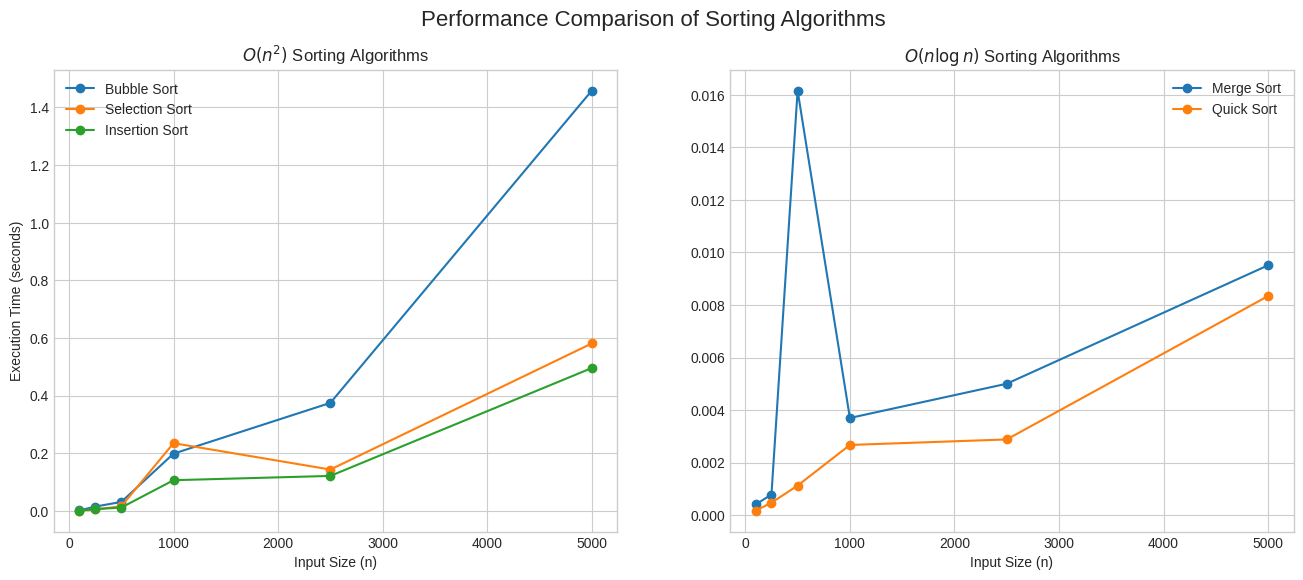

In [ ]:
# Define input sizes for the experiment
input_sizes = [100, 250, 500, 1000, 2500, 5000]
results = {
    "Bubble Sort": [], "Selection Sort": [], "Insertion Sort": [],
    "Merge Sort": [], "Quick Sort": []
}
algorithms = {
    "Bubble Sort": bubble_sort, "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort, "Merge Sort": merge_sort,
    "Quick Sort": quick_sort
}

# Run the experiment
for size in input_sizes:
    random_array = list(np.random.randint(0, size, size))
    for name, algo in algorithms.items():
        time_taken = time_algorithm(algo, random_array)
        results[name].append(time_taken)

print("Sorting experiments complete.")

# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for O(n^2) algorithms
for name in ["Bubble Sort", "Selection Sort", "Insertion Sort"]:
    ax1.plot(input_sizes, results[name], marker='o', linestyle='-', label=name)
ax1.set_title('$O(n^2)$ Sorting Algorithms')
ax1.set_xlabel('Input Size (n)')
ax1.set_ylabel('Execution Time (seconds)')
ax1.legend()

# Plot for O(n log n) algorithms
for name in ["Merge Sort", "Quick Sort"]:
    ax2.plot(input_sizes, results[name], marker='o', linestyle='-', label=name)
ax2.set_title('$O(n \log n)$ Sorting Algorithms')
ax2.set_xlabel('Input Size (n)')
ax2.legend()

fig.suptitle('Performance Comparison of Sorting Algorithms', fontsize=16)
plt.show()

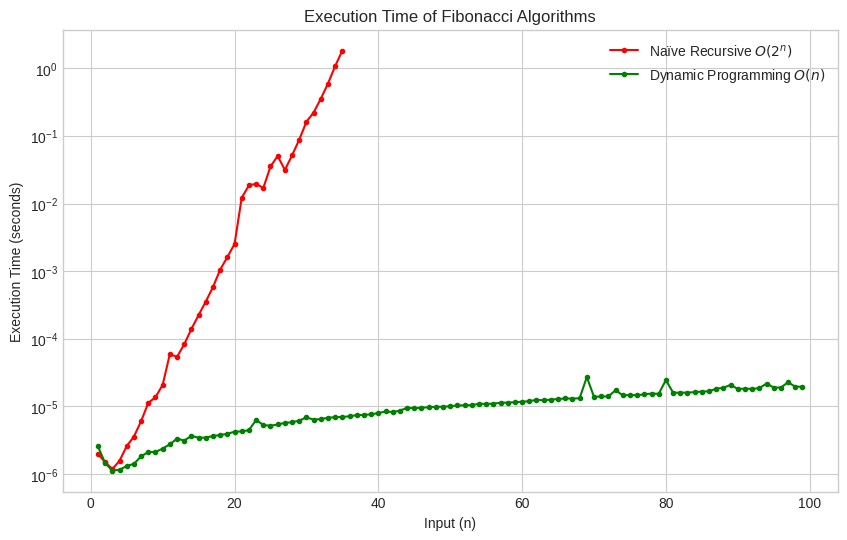

In [ ]:
# Input values for Fibonacci (naive is too slow for n > 35)
fib_inputs_rec = range(1, 36)
fib_inputs_dp = range(1, 100)

# Time the algorithms
times_recursive = [time_fib_algorithm(fib_recursive, n) for n in fib_inputs_rec]
times_dp = [time_fib_algorithm(fib_dp, n) for n in fib_inputs_dp]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fib_inputs_rec, times_recursive, label='Naïve Recursive $O(2^n)$', color='red', marker='.')
plt.plot(fib_inputs_dp, times_dp, label='Dynamic Programming $O(n)$', color='green', marker='.')
plt.title('Execution Time of Fibonacci Algorithms')
plt.xlabel('Input (n)')
plt.ylabel('Execution Time (seconds)')
plt.yscale('log') # Use a log scale to see both plots clearly
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
%%writefile temp_sorter.py

# We create this file to demonstrate memory profiling.
# memory_profiler works best when profiling a function from an imported module.

def merge_sort_for_profiling(arr):
    """A standard merge sort implementation for memory profiling."""
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort_for_profiling(left_half)
        merge_sort_for_profiling(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k], i, k = left_half[i], i + 1, k + 1
        while j < len(right_half):
            arr[k], j, k = right_half[j], j + 1, k + 1
    return arr

def profile_runner():
    """A wrapper function to generate data and run the sort."""
    data = list(range(10000)) # Create a list of 10,000 elements
    sorted_data = merge_sort_for_profiling(data)
    return len(sorted_data)

Writing temp_sorter.py


In [ ]:
from temp_sorter import profile_runner
%mprun -f profile_runner profile_runner